In [1]:
import numpy as np, scipy.stats as ss, pandas as pd, statsmodels.api as sm
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt

%matplotlib inline

## Generate Moving Average MA(1) Model:

Okay so this was actually much trickier than I had first anticipated. The Python statsmodels library still seems to be in its infancy, and I had to refer both to Wes McKinney's 2011 statsmodels paper he has on his site, as well as this webpage: http://statsmodels.sourceforge.net/stable/generated/statsmodels.tsa.arima_process.arma_generate_sample.html#statsmodels.tsa.arima_process.arma_generate_sample to get a better idea of what was happening with this function. The function we'll be using is statsmodels.tsa.arima_process.arma_generate_sample(). In general, the ARMA model is

\begin{equation}
    Y_t = c + \varepsilon_t +  \sum_{i=1}^p \varphi_i Y_{t-i} + \sum_{i=1}^q \theta_i \varepsilon_{t-i}
\end{equation}

where $\varphi_i$ and $\theta_i$ are the non-zero lag AR and MA weights, respectively. So we are going to set all $\varphi_{1...N}$ to 0 and $\theta_1$ to 0.5. This leaves us with

\begin{equation}
    Y_t = c + \varepsilon_t +   \theta_1 \varepsilon_{t-1} = 0.05 + \varepsilon_t + 0.5 \varepsilon_{t-1}.
\end{equation}

Unlike in R, we must add the 0 lag term for both the AR and MA components of the arma-process generator. I believe under the hood, the function uses some FIR filtering. Because of differences in digital signal processing filtering conventions and ARMA stats conventions, we will have to multiply our AR parameters by -1. 

In [2]:
import statsmodels.tsa.arima_process as tsp

np.random.seed(123)

# number of samples we'll want to use
nsamples=250;

# these are the parameters that we'd like to use for lag j=1
maparams= 0.5
arparams = 0

# must include 0 lag weight 1
ar=np.r_[1,-arparams] # and mult arparams by -1 due to sig processing filtering conventions
ma=np.r_[1.,maparams]

#create the noise generator -- normal distribution with mean 0 and std 0.1
sigma = 0.1
mu=0
noise = sigma * np.random.randn() + mu 

#don't forget to add the 0.05 offset
ma1_sim=tsp.arma_generate_sample(ar,ma,nsamples,noise) +0.05

##Now let's plot it: 

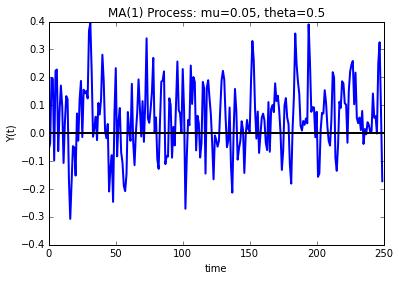

In [3]:
plt.plot(ma1_sim,linewidth=2)
plt.axhline(y=0,color='k',linewidth=2) #draw black line at y=0
plt.title('MA(1) Process: mu=0.05, theta=0.5')
plt.ylabel('Y(t)')
plt.xlabel('time')

##Now let's plot and compare the theoretical vs sample autocorrelation coefficient function. As you can see they're pretty close.

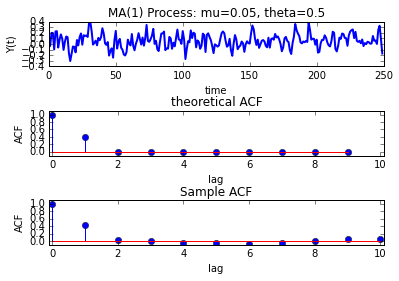

In [4]:
#create 3 subplots
plt.subplot(3, 1, 1)
plt.plot(ma1_sim,linewidth=2)
plt.title('MA(1) Process: mu=0.05, theta=0.5')
plt.ylabel('Y(t)')
plt.xlabel('time')

#create the theoretical autocorrelation function
acf_ma1_model = tsp.arma_acf(ar,ma,10)

#plot theoretical ACF
plt.subplot(3, 1, 2)
plt.stem(acf_ma1_model,linewidth=2)
plt.title('theoretical ACF')
plt.ylabel('ACF')
plt.xlabel('lag')
plt.axis([-0.1,10.1,-0.1,1.1])

#compute the autocorrelation on our simulated data
tmp=sm.tsa.acf(ma1_sim,nlags=10)

#plot simulated ACF
plt.subplot(3, 1, 3)
plt.stem(tmp,linewidth=2)
plt.title('Sample ACF')
plt.ylabel('ACF')
plt.xlabel('lag')
plt.axis([-0.1,10.1,-0.1,1.1])
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1)

##An AR(1) Model: 

Now let's consider setting all $\theta$ to 0, thus leaving us with
\begin{equation}
    Yt−0.05=\varphi(Yt−1−0.05).
\end{equation}
Let's set $\varphi$ to 0.5 now and see what happens. Remember, as I mentioned above, we'll need to multiply the AR parameters by -1. Also, don't forget to add the lag-0 term.

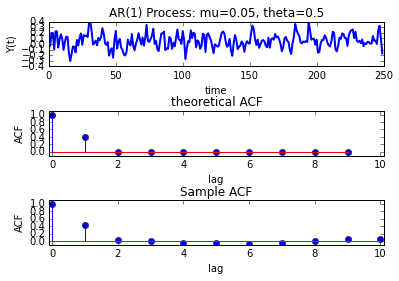

In [5]:
#same code as before
maparams= 0 #This is now zero
arparams = 0.5 #this is now 0.5

# must include 0 lag weight 1
ar=np.r_[1,-arparams] # and mult arparams by -1 due to sig processing filtering conventions
ma=np.r_[1.,maparams]

#create the noise generator -- normal distribution with mean 0 and std 0.1
sigma = 0.1
mu=0
noise = sigma * np.random.randn() + mu 

#don't forget to add the 0.05 offset
ar1_sim=tsp.arma_generate_sample(ar,ma,nsamples,noise) +0.05

#create 3 subplots
plt.subplot(3, 1, 1)
plt.plot(ma1_sim,linewidth=2)
plt.title('AR(1) Process: mu=0.05, theta=0.5')
plt.ylabel('Y(t)')
plt.xlabel('time')

#create the theoretical autocorrelation function
acf_ar1_model = tsp.arma_acf(ar,ma,10)

#plot theoretical ACF
plt.subplot(3, 1, 2)
plt.stem(acf_ma1_model,linewidth=2)
plt.title('theoretical ACF')
plt.ylabel('ACF')
plt.xlabel('lag')
plt.axis([-0.1,10.1,-0.1,1.1])

#compute the autocorrelation on our simulated data
tmp=sm.tsa.acf(ma1_sim,nlags=10)

#plot simulated ACF
plt.subplot(3, 1, 3)
plt.stem(tmp,linewidth=2)
plt.title('Sample ACF')
plt.ylabel('ACF')
plt.xlabel('lag')
plt.axis([-0.1,10.1,-0.1,1.1])
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1)

We see when comparing the above AR(1) plots to those of the MA(1) generated plots, the AR(1) process seems to be more autocorrelated with itself at time lags>1. Also, the time series of the AR(1) process seems to be smoother than that of the MA(1).